In [64]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
train = pd.read_csv("train.csv")
submission = pd.read_csv("example_sample_submission.csv")       
features = pd.read_csv("features.csv")       
examples = pd.read_csv("example_test.csv")

In [98]:
features_df = train.iloc[:,8:]
features_df.fillna(0, inplace = True)
features_names = features_df.columns
features_df.head()
#features_names

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,-1.872746,-2.191242,-0.474163,-0.323046,0.014688,-0.002484,0.0,0.0,-0.989982,-1.055090,...,0.0,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,-1.349537,-1.704709,0.068058,0.028432,0.193794,0.138212,0.0,0.0,-0.151877,-0.384952,...,0.0,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0.812780,-0.256156,0.806463,0.400221,-0.614188,-0.354800,0.0,0.0,5.448261,2.668029,...,0.0,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,1.174378,0.344640,0.066872,0.009357,-1.006373,-0.676458,0.0,0.0,4.508206,2.484260,...,0.0,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,-3.172026,-3.093182,-0.161518,-0.128149,-0.195006,-0.143780,0.0,0.0,2.683018,1.450991,...,0.0,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4


In [67]:
features

,feature,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,...,tag_19,tag_20,tag_21,tag_22,tag_23,tag_24,tag_25,tag_26,tag_27,tag_28
0,feature_0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,feature_1,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,feature_2,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,feature_3,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,feature_4,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,feature_125,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
126,feature_126,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
127,feature_127,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
128,feature_128,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [88]:
#convert to binary
features_tag = features*1

In [89]:
features_tag

,feature,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,...,tag_19,tag_20,tag_21,tag_22,tag_23,tag_24,tag_25,tag_26,tag_27,tag_28
0,feature_0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,feature_1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,feature_2,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,feature_3,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,feature_4,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,feature_125,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
126,feature_126,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
127,feature_127,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
128,feature_128,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [70]:
features.isnull().sum()

feature    0
tag_0      0
tag_1      0
tag_2      0
tag_3      0
tag_4      0
tag_5      0
tag_6      0
tag_7      0
tag_8      0
tag_9      0
tag_10     0
tag_11     0
tag_12     0
tag_13     0
tag_14     0
tag_15     0
tag_16     0
tag_17     0
tag_18     0
tag_19     0
tag_20     0
tag_21     0
tag_22     0
tag_23     0
tag_24     0
tag_25     0
tag_26     0
tag_27     0
tag_28     0
dtype: int64

In [71]:
features_add = features*1

In [72]:
features_add

,feature,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,...,tag_19,tag_20,tag_21,tag_22,tag_23,tag_24,tag_25,tag_26,tag_27,tag_28
0,feature_0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,feature_1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,feature_2,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,feature_3,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,feature_4,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,feature_125,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
126,feature_126,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
127,feature_127,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
128,feature_128,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
features_add = features*1
features_add = features_add.set_index('feature')
features_add.fillna(0)
features_add['Total'] = features_add[features_add.columns].sum(axis=1)
features_add = features_add.reset_index()
features_add1 =features_add[['feature','Total']]

In [74]:
features_add1

,feature,Total
0,feature_0,0
1,feature_1,2
2,feature_2,3
3,feature_3,2
4,feature_4,3
...,...,...
125,feature_125,3
126,feature_126,2
127,feature_127,3
128,feature_128,2


In [75]:
!pip install kmodes

In [76]:
from sklearn.cluster import KMeans
from kmodes import kmodes

In [77]:
#looking for the best number of clusters
cost = []
max_clust = 15
for num_clusters in list(range(1,max_num_clusters)):
    kmode = kmodes.KModes(n_clusters = num_clusters, init = "Cao", n_init = 5, verbose=1)
    kmode.fit_predict(features.iloc[:,7:])
    cost.append(kmode.cost_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 308.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 260.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 212.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12, cost: 172.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves:

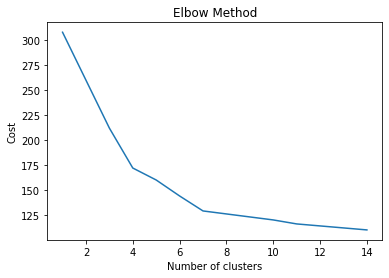

In [78]:
max_num_clusters=15

plt.plot(range(1, max_num_clusters), cost)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.show()

In [101]:
#Tags matrix is clustered using 4 cluster in Kmodes
#now we want to see the cluster each feature is assign to
#and the distance of each feature to its cluster centriod
n_clusters_kmodes = 4
kmode_cao = kmodes.KModes(n_clusters = n_clusters_kmodes, init = "Cao", n_init = 10, verbose=1)
tags_feat_labels = kmode_cao.fit_predict(features.iloc[:,7:])

tags_clust_df = pd.DataFrame(np.c_[features_names, tags_feat_labels])
tags_clust_df.columns = ["feature", "cluster"]
tags_clust_df['feat_list'] = tags_clust_df.groupby(["cluster"]).transform(lambda x: ', '.join(x))
tags_clust_df = tags_clust_df.groupby(["cluster", "feat_list"]).size().reset_index(name = 'feat_count')
tags_clust_df.head()

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12, cost: 172.0


,cluster,feat_list,feat_count
0,0,"feature_1, feature_2, feature_4, feature_6, fe...",62
1,1,"feature_79, feature_80, feature_81, feature_82...",24
2,2,"feature_73, feature_74, feature_75, feature_76...",24
3,3,"feature_3, feature_5, feature_7, feature_9, fe...",20


In [118]:
tags_clust_df.feat_list[3]

'feature_3, feature_5, feature_7, feature_9, feature_11, feature_13, feature_15, feature_17, feature_19, feature_21, feature_23, feature_25, feature_27, feature_29, feature_31, feature_33, feature_35, feature_37, feature_39, feature_41'

In [104]:
def nodes_distances(nodes_clustered, centroids):
    distances = [] 
    for node in nodes_clustered:
        # Centroid value of the current node
        centroid = centroids[node[-1]]     
        distances.append([node[0], node[-1], np.sum(centroid != node[1:-1])])
    return np.array(distances)

tags_nodes_clustered = np.c_[features.to_numpy(), tags_feat_labels]
tags_nodes_dist = nodes_distances(tags_nodes_clustered, kmode_cao.cluster_centroids_)

tag_clust_dist = np.c_[features_names, tags_nodes_dist[:,2], tags_feat_labels]
tag_clust_dist_df = pd.DataFrame(tag_clust_dist)
tag_clust_dist_df.columns = ['feature', 'dist_tags', 'cluster_tags']
tag_clust_dist_df

<ipython-input-104-b588ed13d7a2>:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  distances.append([node[0], node[-1], np.sum(centroid != node[1:-1])])


,feature,dist_tags,cluster_tags
0,feature_1,1,0
1,feature_2,1,0
2,feature_3,1,3
3,feature_4,1,0
4,feature_5,1,3
...,...,...,...
125,feature_126,1,0
126,feature_127,1,0
127,feature_128,1,0
128,feature_129,1,0


In [112]:
#correlation of some features in cluster 0

train[['feature_1', 'feature_2', 'feature_4', 'featu8', 'feature_10', 'feature_12', 'feature_14', 'feature_16', 'feature_18']].corr().style.background_gradient(cmap='coolwarm')re_6', 'feature_

,feature_1,feature_2,feature_4,feature_6,feature_8,feature_10,feature_12,feature_14,feature_16,feature_18
feature_1,1.000000,0.861774,0.005958,-0.003411,0.078317,0.579200,0.160063,0.277628,0.485700,0.083971
feature_2,0.861774,1.000000,0.007794,-0.011396,0.093619,0.672005,0.186245,0.324200,0.560319,0.087750
feature_4,0.005958,0.007794,1.000000,0.645455,0.399991,0.052276,0.255152,0.158485,0.077297,0.160396
feature_6,-0.003411,-0.011396,0.645455,1.000000,0.276060,0.025366,0.171214,0.103041,0.043281,0.150494
feature_8,0.078317,0.093619,0.399991,0.276060,1.000000,0.177116,0.598935,0.380401,0.221612,0.425576
feature_10,0.579200,0.672005,0.052276,0.025366,0.177116,1.000000,0.315831,0.512709,0.835644,0.155875
feature_12,0.160063,0.186245,0.255152,0.171214,0.598935,0.315831,1.000000,0.638546,0.391297,0.360816
feature_14,0.277628,0.324200,0.158485,0.103041,0.380401,0.512709,0.638546,1.000000,0.631322,0.270057
feature_16,0.485700,0.560319,0.077297,0.043281,0.221612,0.835644,0.391297,0.631322,1.000000,0.186210
feature_18,0.083971,0.087750,0.160396,0.150494,0.425576,0.155875,0.360816,0.270057,0.186210,1.000000


In [114]:
#correlation of some features in cluster 1

train[['feature_79', 'feature_80', 'feature_81', 'feature_82', 'feature_83', 'feature_84', 'feature_91', 'feature_92', 'feature_93', 'feature_94']].corr().style.background_gradient(cmap='coolwarm')

,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_91,feature_92,feature_93,feature_94
feature_79,1.000000,0.407090,0.634300,0.866233,0.092255,0.056255,0.722275,0.157038,0.322856,0.577112
feature_80,0.407090,1.000000,0.710259,0.499480,0.253160,0.124517,0.293833,0.358393,0.374893,0.332465
feature_81,0.634300,0.710259,1.000000,0.748511,0.166303,0.084422,0.465905,0.251676,0.493556,0.489823
feature_82,0.866233,0.499480,0.748511,1.000000,0.114023,0.060213,0.620657,0.174102,0.359313,0.631582
feature_83,0.092255,0.253160,0.166303,0.114023,1.000000,0.086827,0.058001,0.083531,0.081460,0.071191
feature_84,0.056255,0.124517,0.084422,0.060213,0.086827,1.000000,0.118245,0.552368,0.426647,0.228386
feature_91,0.722275,0.293833,0.465905,0.620657,0.058001,0.118245,1.000000,0.319810,0.524038,0.833701
feature_92,0.157038,0.358393,0.251676,0.174102,0.083531,0.552368,0.319810,1.000000,0.829997,0.506319
feature_93,0.322856,0.374893,0.493556,0.359313,0.081460,0.426647,0.524038,0.829997,1.000000,0.717885
feature_94,0.577112,0.332465,0.489823,0.631582,0.071191,0.228386,0.833701,0.506319,0.717885,1.000000


In [117]:
#correlation of some features in cluster 2

train[['feature_73', 'feature_74', 'feature_75', 'feature_76', 'feature_77', 'feature_78', 'feature_85', 'feature_86', 'feature_87', 'feature_88']].corr().style.background_gradient(cmap='coolwarm')

,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_85,feature_86,feature_87,feature_88
feature_73,1.000000,0.444890,0.695438,0.925726,0.098669,0.200754,0.757396,0.177752,0.426935,0.668574
feature_74,0.444890,1.000000,0.718267,0.510794,0.257788,0.475848,0.337408,0.392822,0.409420,0.372346
feature_75,0.695438,0.718267,1.000000,0.778678,0.176298,0.335709,0.523557,0.261321,0.533803,0.548919
feature_76,0.925726,0.510794,0.778678,1.000000,0.117230,0.236109,0.700085,0.197687,0.456465,0.704515
feature_77,0.098669,0.257788,0.176298,0.117230,1.000000,0.339479,0.067462,0.084399,0.086354,0.076952
feature_78,0.200754,0.475848,0.335709,0.236109,0.339479,1.000000,0.165099,0.241095,0.233515,0.192501
feature_85,0.757396,0.337408,0.523557,0.700085,0.067462,0.165099,1.000000,0.327492,0.608310,0.892429
feature_86,0.177752,0.392822,0.261321,0.197687,0.084399,0.241095,0.327492,1.000000,0.796903,0.494322
feature_87,0.426935,0.409420,0.533803,0.456465,0.086354,0.233515,0.608310,0.796903,1.000000,0.764520
feature_88,0.668574,0.372346,0.548919,0.704515,0.076952,0.192501,0.892429,0.494322,0.764520,1.000000


In [119]:
#correlation of some features in cluster 3

train[['feature_3', 'feature_5', 'feature_7', 'feature_9', 'feature_11', 'feature_13', 'feature_15', 'feature_17', 'feature_19', 'feature_21']].corr().style.background_gradient(cmap='coolwarm')

,feature_3,feature_5,feature_7,feature_9,feature_11,feature_13,feature_15,feature_17,feature_19,feature_21
feature_3,1.000000,0.695323,0.371276,0.054474,0.236746,0.144422,0.076763,0.119955,0.009326,0.053346
feature_5,0.695323,1.000000,0.279179,0.039911,0.176271,0.108320,0.056553,0.075671,0.008838,0.029550
feature_7,0.371276,0.279179,1.000000,0.198300,0.588995,0.375375,0.236148,0.402987,0.052383,0.181226
feature_9,0.054474,0.039911,0.198300,1.000000,0.338168,0.571267,0.861354,0.183740,0.389831,0.236832
feature_11,0.236746,0.176271,0.588995,0.338168,1.000000,0.639206,0.407044,0.354823,0.121925,0.383179
feature_13,0.144422,0.108320,0.375375,0.571267,0.639206,1.000000,0.669925,0.277186,0.226602,0.359400
feature_15,0.076763,0.056553,0.236148,0.861354,0.407044,0.669925,1.000000,0.209315,0.350663,0.275922
feature_17,0.119955,0.075671,0.402987,0.183740,0.354823,0.277186,0.209315,1.000000,0.677589,0.885678
feature_19,0.009326,0.008838,0.052383,0.389831,0.121925,0.226602,0.350663,0.677589,1.000000,0.768556
feature_21,0.053346,0.029550,0.181226,0.236832,0.383179,0.359400,0.275922,0.885678,0.768556,1.000000


In [120]:
train['action'] = (train['resp'] > 0)*1

In [121]:
train['action']

0          1
1          0
2          1
3          0
4          0
          ..
2390486    1
2390487    0
2390488    1
2390489    0
2390490    0
Name: action, Length: 2390491, dtype: int32